In [9]:
!pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import adam_v2

# データの読み込み
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# x_train1, x_valid, y_train1, y_valid = train_test_split(x_train, y_train, test_size=0.175)
# # 28 x 28の画像がgrayscaleで1chなので、28, 28, 1にreshapeする
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# # x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# 0-255の整数値を0〜1の小数に変換する
x_train = x_train.astype('float32')
# x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
# x_valid /= 255
x_test /= 255

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


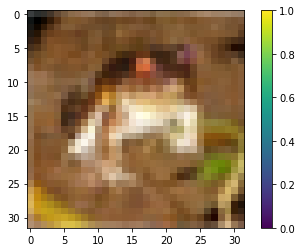

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [3]:
print(x_train.shape,x_test.shape)
print(y_train.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1)


In [12]:
m_train, m_test = x_train.shape[0], x_test.shape[0]
# ベクトル化
x_train, x_test = x_train.reshape(m_train, -1), x_test.reshape(m_test, -1)
# ノルムで標準化
x_train = x_train / np.linalg.norm(x_train, ord=2, axis=1, keepdims=True)
x_test = x_test / np.linalg.norm(x_test, ord=2, axis=1, keepdims=True)
# yをOneHotVector化
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [8]:
x_train

array([[0.0091949 , 0.00966243, 0.00981828, ..., 0.01916902, 0.0143378 ,
        0.01122089],
       [0.01933612, 0.02222399, 0.02347958, ..., 0.01795497, 0.01669938,
        0.01808053],
       [0.02927202, 0.02927202, 0.02927202, ..., 0.00918338, 0.00987213,
        0.00964255],
       ...,
       [0.0048848 , 0.02484272, 0.03279797, ..., 0.00167479, 0.00432654,
        0.00697829],
       [0.01906967, 0.02128942, 0.02421545, ..., 0.01967505, 0.01917057,
        0.01725351],
       [0.02867814, 0.02867814, 0.02993046, ..., 0.02041283, 0.02041283,
        0.02016236]], dtype=float32)

In [11]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [13]:
# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, BatchNormalization, Activation,Dropout

# ヘルパーライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(32, 32)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

2.8.0


In [15]:
x_train.shape[1:]

3072

In [ ]:
print(x_train.shape) #(50000, 3072)
model = Sequential()
# model.add(BatchNormalization())
model.add(Dense(768, activation="relu", input_shape=x_train.shape[1:]))
model.add(Dropout(0.25))
# model.add(BatchNormalization())
model.add(Dense(192, activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

(50000, 3072)


In [ ]:
model.compile(optimizer=adam_v2.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# model.fit(x_train, y_train, epochs=5)
h = model.fit(x_train, y_train,epochs=20, batch_size=50)

Epoch 1/20
1000/1000 [==============================] - 17s 16ms/step - loss: 1.8925 - accuracy: 0.3114
Epoch 2/20
1000/1000 [==============================] - 17s 17ms/step - loss: 1.7161 - accuracy: 0.3849
Epoch 3/20
1000/1000 [==============================] - 16s 16ms/step - loss: 1.6378 - accuracy: 0.4159
Epoch 4/20
1000/1000 [==============================] - 16s 16ms/step - loss: 1.5900 - accuracy: 0.4336
Epoch 5/20
1000/1000 [==============================] - 16s 16ms/step - loss: 1.5530 - accuracy: 0.4460
Epoch 6/20
1000/1000 [==============================] - 16s 16ms/step - loss: 1.5158 - accuracy: 0.4567
Epoch 7/20
1000/1000 [==============================] - 16s 16ms/step - loss: 1.4902 - accuracy: 0.4673
Epoch 8/20
1000/1000 [==============================] - 16s 16ms/step - loss: 1.4608 - accuracy: 0.4769
Epoch 9/20
1000/1000 [==============================] - 17s 17ms/step - loss: 1.4390 - accuracy: 0.4848
Epoch 10/20
1000/1000 [==============================] - 16s 16m

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=1)
print('\nテストスコア:', test_acc)
print('\n訓練スコア：',train_acc)

1563/1563 [==============================] - 10s 6ms/step - loss: 1.1522 - accuracy: 0.5913

テストスコア: 0.5286999940872192

訓練スコア： 0.5913000106811523


In [ ]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(20, 8))

axL.set_title('model loss')
axL.set_xlabel('epoch')
axL.set_ylabel('loss')

axR.set_title('model accuracy')
axR.set_xlabel('epoch')
axR.set_ylabel('accuracy')


axL.plot(model.history['loss'], label="train ")
axL.plot(model.history['val_loss'], label="val ")
axR.plot(model.history['accuracy'], label="train ")
axR.plot(model.history['val_accuracy'], label="val ")

# **深層学習バッチノーマライゼーションとdropout解説コード**

In [1]:
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten, BatchNormalization


# データの読み込み
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# 小数化
x_train = x_train / 255.0
x_test = x_test / 255.0
# データ数
m_train, m_test = x_train.shape[0], x_test.shape[0]
# ベクトル化
x_train, x_test = x_train.reshape(m_train, -1), x_test.reshape(m_test, -1)
# ノルムで標準化
x_train = x_train / np.linalg.norm(x_train, ord=2, axis=1, keepdims=True)
x_test = x_test / np.linalg.norm(x_test, ord=2, axis=1, keepdims=True)
# yをOneHotVector化
y_train, y_test = to_categorical(y_train), to_categorical(y_test)
# モデル
# CONV -> RELU -> MAXPOOL
model = Sequential()
model.add(Conv2D(10, (3, 3), strides=(1, 1), input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPool2D((3, 3)))

# CONV -> RELU -> BN -> Flatten
model.add(Conv2D(20, (3, 3), strides=(1, 1)))
model.add(Activation("relu"))
# model.add(BatchNormalization(axis=3))
model.add(Flatten())

# Softmax
model.add(Dense(10, activation="softmax"))

NameError: ignored

In [ ]:
model.compile(optimizer=adam_v2.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history =  model.fit(x_train,y_train, epochs = 20)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=1)
print('\nテストスコア:', test_acc)
print('\n訓練スコア：',train_acc)